In [1]:
#-- GEO1001.2020--hw01
#-- [Haoyang Dong] 
#-- [5302501]

In [2]:
# import libraries

import pandas as pd
import numpy as np
# import Hw_Functions
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import math
from prettytable import PrettyTable
from scipy import stats
# import matplotlib.mlab as mlab
import time
import datetime
from itertools import combinations
from scipy.stats import sem, t
from scipy import mean
from scipy.stats import ttest_ind

In [3]:
# constant definition

file_dir = 'hw01_data'
column_name_list = ['FORMATTED DATE-TIME', 'Wind Direction', 'Wind Speed', 'Crosswind Speed', 'Headwind Speed', 'Temperature', 'Globe Temperature', 'Wind Chill', 'Relative Humidity', 'Heat Stress Index', 'Dew Point', 'Psychro Wet Bulb Temperature', 'Station Pressure', 'Barometric Pressure', 'Altitude', 'Density Altitude', 'NA Wet Bulb Temperature', 'WBGT', 'TWL ', 'Direction Mag']
fs = 14
sensor_label = ['A', 'B', 'C', 'D', 'E']
sensor_color = ['#32d3eb', '#5bc49f', '#feb64d', '#ff7c7c', '#9287e7']
confidence = 0.95

In [4]:
# functions

def Load_HEAT(HEAT_file):
    HEAT_df = pd.read_excel(HEAT_file, header=None).drop([0, 1, 2, 3, 4])
    HEAT_df.columns=column_name_list
    # return HEAT_df.drop(columns='FORMATTED DATE-TIME')
    return HEAT_df

# To compute mean, variance, and standard deviation
def HEAT_mean_var_std(dataframe):
    mean_list = []
    var_list = []
    std_list = []
    for column_name in column_name_list[1:]:
#         if column_name == 'FORMATTED DATE-TIME':
#             pass
        column_np = np.asarray(dataframe[column_name].values).astype(np.float)
        column_mean = np.mean(column_np)
        column_var = np.var(column_np)
        column_std = np.std(column_np)
        mean_list.append(column_mean)
        var_list.append(column_var)
        std_list.append(column_std)
    return mean_list, var_list, std_list


In [5]:
# name dataframe

names = locals()
# use locals() to definite variables in a loop
for i in sensor_label:
    names['file_'+i] = file_dir+'/'+'HEAT - '+i+'_final.xls'
    names['HEAT_'+i+'_df'] = Load_HEAT(names.get('file_'+i))

In [6]:
# ----------------------------------------------------------------------------------------------------
# Task 1.1

for ii in sensor_label:
    names['mean_list_'+ii], names['var_list_'+ii], names['std_list_'+ii] = HEAT_mean_var_std(names.get('HEAT_'+ii+'_df'))

In [7]:
# print the values in a table (use prettytable)
Table = PrettyTable(['Measurement item', 'Device', 'Mean', 'Variance', 'Standard deviation'])
for iii in range(len(column_name_list)-1):
    for j in ['A', 'B', 'C', 'D', 'E']:
        Table.add_row([column_name_list[iii+1], j,names.get('mean_list_'+j)[iii], names.get('var_list_'+j)[iii], names.get('std_list_'+j)[iii]])
#     for jj in ['A', 'B', 'C', 'D', 'E']:
#         Table.add_row(['Variance', jj, Column_name_list[iii], names.get('var_list_'+jj)[iii]])
#     for jjj in ['A', 'B', 'C', 'D', 'E']:
#         Table.add_row(['Standard deviation', jjj, Column_name_list[iii], names.get('std_list_'+jjj)[iii]])
print(Table)
#         print(column_name_list[iii+1], '&', j, '&', round(names.get('mean_list_'+j)[iii],3), '&', round(names.get('var_list_'+j)[iii],3), '&', round(names.get('std_list_'+j)[iii],3), '\\\\')

+------------------------------+--------+----------------------+--------------------+--------------------+
|       Measurement item       | Device |         Mean         |      Variance      | Standard deviation |
+------------------------------+--------+----------------------+--------------------+--------------------+
|        Wind Direction        |   A    |  209.40630048465266  | 10104.857537040565 | 100.52292045618535 |
|        Wind Direction        |   B    |  183.41235864297255  |  9973.18819944488  | 99.86585101747684  |
|        Wind Direction        |   C    |  183.58892481810832  |  7700.24936804366  | 87.75106476871754  |
|        Wind Direction        |   D    |  198.32659660468877  | 8130.602307980361  | 90.16985254496295  |
|        Wind Direction        |   E    |  223.95636363636365  | 9304.524156473828  |  96.459961416506   |
|          Wind Speed          |   A    |  1.290306946688207   | 1.2506491788047323 | 1.1183242726529423 |
|          Wind Speed          |   B 

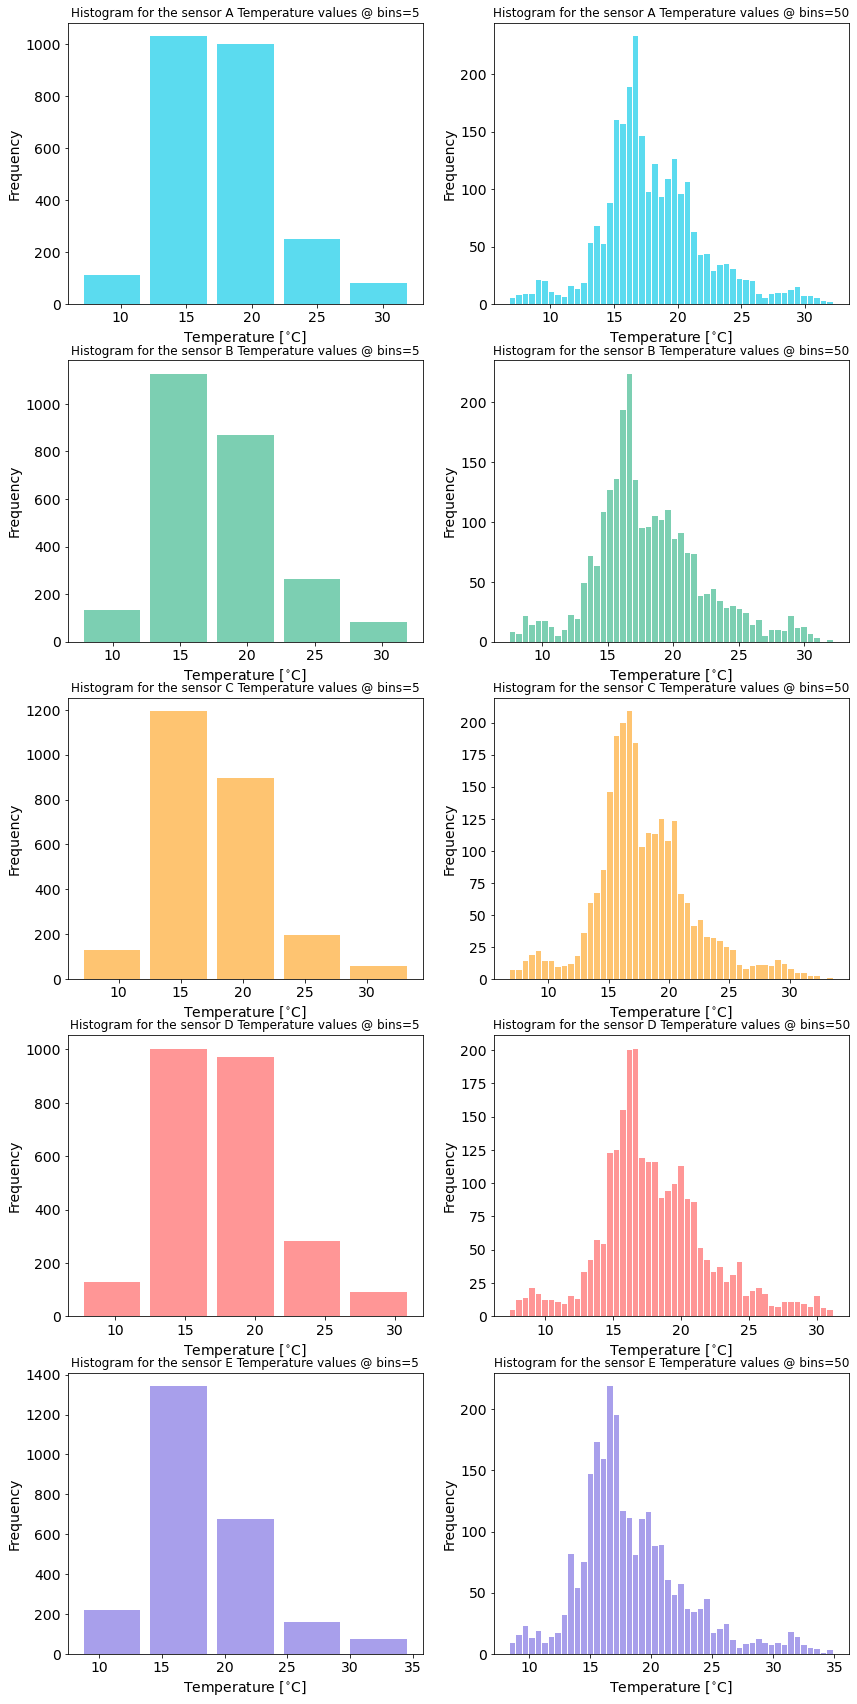

In [8]:
# ----------------------------------------------------------------------------------------------------
# Task 1.2

figA12 = plt.figure(figsize=(14,30))
subplots_A12 = locals()

for i_4 in range(10):
    subplots_A12['ax'+str(i_4+1)] = figA12.add_subplot(5, 2, i_4+1)
    if i_4%2 == 0:
        subplots_A12['y_A12'+str(i_4+1)], subplots_A12['edges_A12'+str(i_4+1)], _ = subplots_A12.get('ax'+str(i_4+1)).hist(names.get('HEAT_'+sensor_label[i_4//2]+'_df')['Temperature'].values.astype(np.float), bins=5, density=False, color=sensor_color[i_4//2], alpha=0.8, rwidth=0.85)
        subplots_A12.get('ax'+str(i_4+1)).set_ylabel('Frequency',fontsize=fs)
        subplots_A12.get('ax'+str(i_4+1)).set_xlabel('Temperature [$^{\circ}$C]', fontsize=fs)
        subplots_A12.get('ax'+str(i_4+1)).tick_params(labelsize=fs)
        subplots_A12.get('ax'+str(i_4+1)).set_title('Histogram for the sensor '+sensor_label[i_4//2]+' Temperature values @ bins=5')
    else:
        subplots_A12['y_A12'+str(i_4+1)], subplots_A12['edges_A12'+str(i_4+1)], _ = subplots_A12.get('ax'+str(i_4+1)).hist(names.get('HEAT_'+sensor_label[i_4//2]+'_df')['Temperature'].values.astype(np.float), bins=50, density=False, color=sensor_color[i_4//2], alpha=0.8, rwidth=0.85)
        subplots_A12.get('ax'+str(i_4+1)).set_ylabel('Frequency',fontsize=fs)
        subplots_A12.get('ax'+str(i_4+1)).set_xlabel('Temperature [$^{\circ}$C]', fontsize=fs)
        subplots_A12.get('ax'+str(i_4+1)).tick_params(labelsize=fs)
        subplots_A12.get('ax'+str(i_4+1)).set_title('Histogram for the sensor '+sensor_label[i_4//2]+' Temperature values @ bins=50')
plt.show()


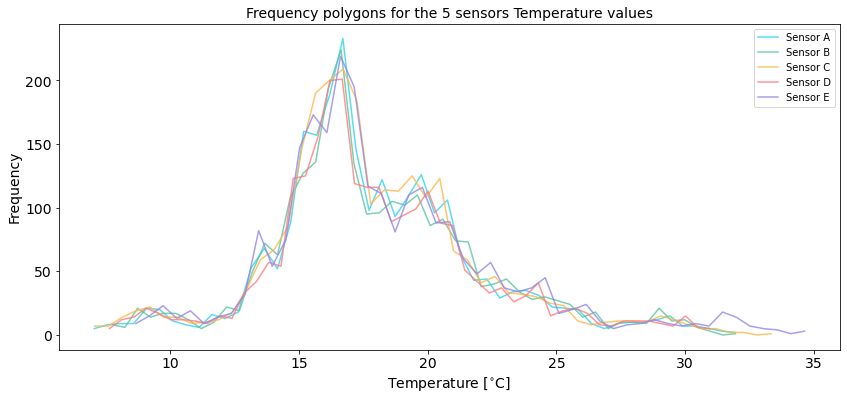

In [9]:
# ----------------------------------------------------------------------------------------------------
# Task 1.3

figA13 = plt.figure(figsize=(14,6))
for i_5 in range(5):
    plt.plot((0.5*(subplots_A12.get('edges_A12'+str((i_5+1)*2))[1:]+subplots_A12.get('edges_A12'+str((i_5+1)*2))[:-1])).tolist(), subplots_A12.get('y_A12'+str((i_5+1)*2)), label = 'Sensor '+sensor_label[i_5], color=sensor_color[i_5], alpha=0.8)
plt.legend(loc = 'best')
plt.title('Frequency polygons for the 5 sensors Temperature values', fontsize=fs)
plt.ylabel('Frequency',fontsize=fs)
plt.xlabel('Temperature [$^{\circ}$C]', fontsize=fs)
plt.tick_params(labelsize=fs)
plt.show()


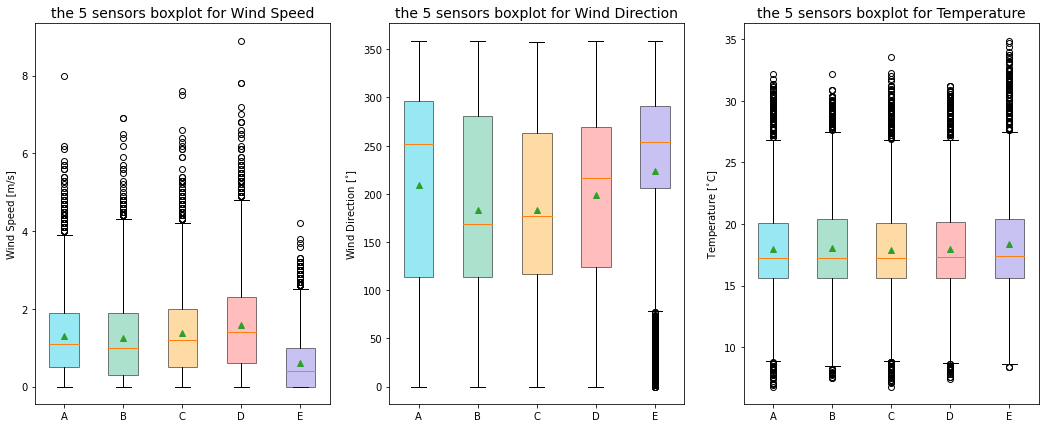

In [10]:
# ----------------------------------------------------------------------------------------------------
# Task 1.4

for i_6 in sensor_label:
    names['data_box_ws_'+i_6] = names.get('HEAT_'+i_6+'_df')['Wind Speed'].values.astype(np.float)
    names['data_box_wd_'+i_6] = names.get('HEAT_'+i_6+'_df')['Wind Direction'].values.astype(np.float)
    names['data_box_temp_'+i_6] = names.get('HEAT_'+i_6+'_df')['Temperature'].values.astype(np.float)
data_box_ws = np.asarray([data_box_ws_A, data_box_ws_B, data_box_ws_C, data_box_ws_D, data_box_ws_E])
data_box_wd = np.asarray([data_box_wd_A, data_box_wd_B, data_box_wd_C, data_box_wd_D, data_box_wd_E])
data_box_temp = np.asarray([data_box_temp_A, data_box_temp_B, data_box_temp_C, data_box_temp_D, data_box_temp_E])
# figA13 = plt.figure(figsize=(14,12))
# ax1 = figA13.add_subplot(2, 2, 1)
# ax1.boxplot(data_box_ws, showmeans=True, vert=True, patch_artist=True, labels=sensor_label)
# ax1.set_ylabel('Wind Speed [m/s]')
# for patch, color in zip(ax1['boxes'], sensor_color):
#     patch.set_facecolor(color)
# data_box_ws
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(18,7))
bplot1 = axes[0].boxplot(data_box_ws, showmeans=True, vert=True, patch_artist=True, labels=sensor_label)
axes[0].set_ylabel('Wind Speed [m/s]')
axes[0].set_title('the 5 sensors boxplot for Wind Speed', fontsize = fs)
bplot2 = axes[1].boxplot(data_box_wd, showmeans=True, vert=True, patch_artist=True, labels=sensor_label)
axes[1].set_ylabel('Wind Direction [$^{\circ}$]')
axes[1].set_title('the 5 sensors boxplot for Wind Direction', fontsize = fs)
bplot3 = axes[2].boxplot(data_box_temp, showmeans=True, vert=True, patch_artist=True, labels=sensor_label)
axes[2].set_ylabel('Temperature [$^{\circ}$C]')
axes[2].set_title('the 5 sensors boxplot for Temperature', fontsize = fs)

for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], sensor_color):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)
plt.show()


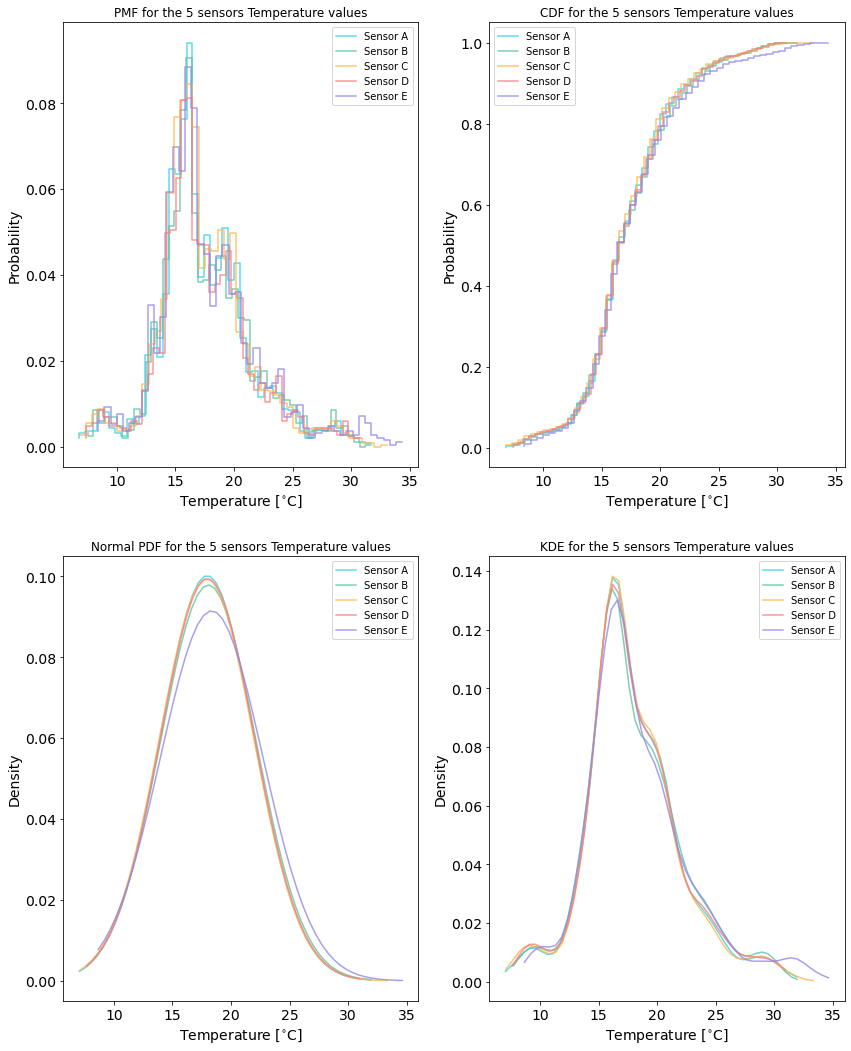

In [11]:
# ----------------------------------------------------------------------------------------------------
# Task 2.1

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,18))
subplots_A21 = locals()
# print(type(ax[0][0]))
for i_7 in range(5):
    # plot the 1st subplot
    subplots_A21['data_temp_'+sensor_label[i_7]] = names.get('HEAT_'+sensor_label[i_7]+'_df')['Temperature'].values.astype(np.float)
    subplots_A21['heights_temp_'+sensor_label[i_7]], subplots_A21['bins_temp_'+sensor_label[i_7]] =  np.histogram(subplots_A21.get('data_temp_'+sensor_label[i_7]), bins=50)
    # get the probability: 
    subplots_A21['heights_temp_'+sensor_label[i_7]] = subplots_A21.get('heights_temp_'+sensor_label[i_7])/sum(subplots_A21.get('heights_temp_'+sensor_label[i_7]))
    ax[0][0].step(subplots_A21.get('bins_temp_'+sensor_label[i_7])[:-1], subplots_A21.get('heights_temp_'+sensor_label[i_7]), color=sensor_color[i_7], alpha=0.8, label='Sensor '+sensor_label[i_7])
    
    # plot the 2nd subplot
    # compute the sum probability:
    a = []
    for j in range(len(subplots_A21.get('heights_temp_'+sensor_label[i_7]))):
        if j == 0:
            a.append(subplots_A21.get('heights_temp_'+sensor_label[i_7])[0])
        else:
            a.append(subplots_A21.get('heights_temp_'+sensor_label[i_7])[j]+a[j-1])
    subplots_A21['CDF_temp_'+sensor_label[i_7]] = a
    ax[0][1].step(subplots_A21.get('bins_temp_'+sensor_label[i_7])[:-1], subplots_A21.get('CDF_temp_'+sensor_label[i_7]), color=sensor_color[i_7], alpha=0.8, label='Sensor '+sensor_label[i_7])
    
    # plot the 3rd subplot
    subplots_A21['density_temp_'+sensor_label[i_7]] = np.histogram(subplots_A21.get('data_temp_'+sensor_label[i_7]), bins=50, density=True)
    # compute the nomal PDF:
    subplots_A21['PDF_temp_'+sensor_label[i_7]] = stats.norm.pdf(0.5*(subplots_A21.get('bins_temp_'+sensor_label[i_7])[1:]+subplots_A21.get('bins_temp_'+sensor_label[i_7])[:-1]), names.get('mean_list_'+sensor_label[i_7])[4], names.get('std_list_'+sensor_label[i_7])[4])
    ax[1][0].plot(0.5*(subplots_A21.get('bins_temp_'+sensor_label[i_7])[1:]+subplots_A21.get('bins_temp_'+sensor_label[i_7])[:-1]), subplots_A21.get('PDF_temp_'+sensor_label[i_7]), color=sensor_color[i_7], alpha=0.8, label='Sensor '+sensor_label[i_7])
    
    # plot the 4th subplot
    subplots_A21['KDE_temp_'+sensor_label[i_7]] = stats.kde.gaussian_kde(subplots_A21.get('data_temp_'+sensor_label[i_7]))
    subplots_A21['KDE_temp_'+sensor_label[i_7]] = subplots_A21.get('KDE_temp_'+sensor_label[i_7])(0.5*(subplots_A21.get('bins_temp_'+sensor_label[i_7])[1:]+subplots_A21.get('bins_temp_'+sensor_label[i_7])[:-1]))
    ax[1][1].plot(0.5*(subplots_A21.get('bins_temp_'+sensor_label[i_7])[1:]+subplots_A21.get('bins_temp_'+sensor_label[i_7])[:-1]), subplots_A21.get('KDE_temp_'+sensor_label[i_7]), color=sensor_color[i_7], alpha=0.8, label='Sensor '+sensor_label[i_7])

# set labels, legends, and titles
ax[0][0].set_ylabel('Probability',fontsize=fs)
ax[0][0].set_xlabel('Temperature [$^{\circ}$C]', fontsize=fs)
ax[0][0].tick_params(labelsize=fs)
ax[0][0].set_title('PMF for the 5 sensors Temperature values')
ax[0][0].legend(loc = 'best')
ax[0][1].set_ylabel('Probability',fontsize=fs)
ax[0][1].set_xlabel('Temperature [$^{\circ}$C]', fontsize=fs)
ax[0][1].tick_params(labelsize=fs)
ax[0][1].set_title('CDF for the 5 sensors Temperature values')
ax[0][1].legend(loc = 'best')
ax[1][0].set_ylabel('Density',fontsize=fs)
ax[1][0].set_xlabel('Temperature [$^{\circ}$C]', fontsize=fs)
ax[1][0].tick_params(labelsize=fs)
ax[1][0].set_title('Normal PDF for the 5 sensors Temperature values')
ax[1][0].legend(loc = 'best')
ax[1][1].set_ylabel('Density',fontsize=fs)
ax[1][1].set_xlabel('Temperature [$^{\circ}$C]', fontsize=fs)
ax[1][1].tick_params(labelsize=fs)
ax[1][1].set_title('KDE for the 5 sensors Temperature values')
ax[1][1].legend(loc = 'best')

plt.show()

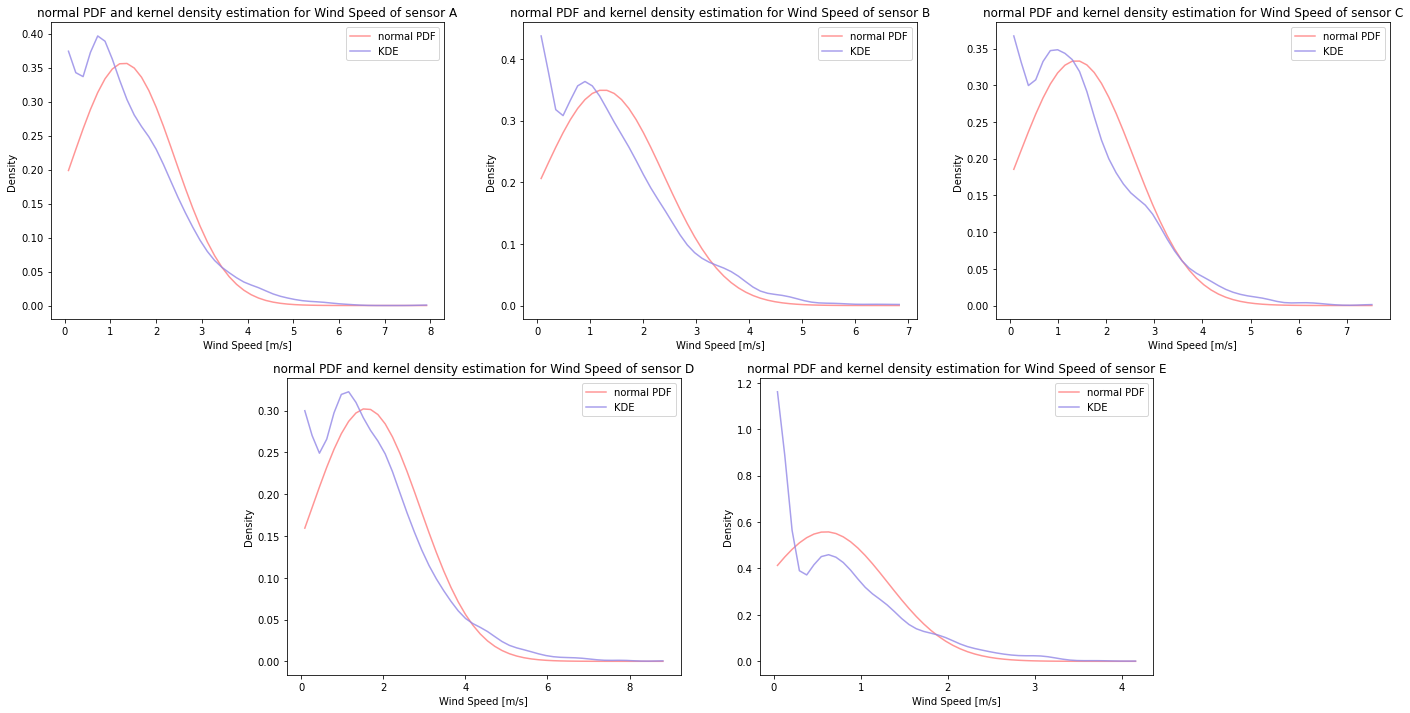

In [12]:
# ----------------------------------------------------------------------------------------------------
# Task 2.2

fig, axes = plt.subplots(1 ,figsize=(24,12))
gs = GridSpec(2, 6)
gs.update(wspace=0.5)
subplots_A22 = locals()
subplots_A22['ax1'] = plt.subplot(gs[0, 0:2])
subplots_A22['ax2'] = plt.subplot(gs[0, 2:4])
subplots_A22['ax3'] = plt.subplot(gs[0, 4:6])
subplots_A22['ax4'] = plt.subplot(gs[1, 1:3])
subplots_A22['ax5'] = plt.subplot(gs[1, 3:5])
for i_8 in range(5):
    subplots_A22['data_ws_'+sensor_label[i_8]] = names.get('HEAT_'+sensor_label[i_8]+'_df')['Wind Speed'].values.astype(np.float)
    subplots_A22['density_ws_'+sensor_label[i_8]], subplots_A22['bins_ws_'+sensor_label[i_8]] =  np.histogram(subplots_A22.get('data_ws_'+sensor_label[i_8]), bins=50, density=True)
    subplots_A22['KDE_ws_'+sensor_label[i_8]] = stats.kde.gaussian_kde(names.get('HEAT_'+sensor_label[i_8]+'_df')['Wind Speed'].values.astype(float))
    subplots_A22['KDE_ws_'+sensor_label[i_8]] = subplots_A22.get('KDE_ws_'+sensor_label[i_8])(0.5*(subplots_A22.get('bins_ws_'+sensor_label[i_8])[1:]+subplots_A22.get('bins_ws_'+sensor_label[i_8])[:-1]))
    subplots_A21['PDF_ws_'+sensor_label[i_8]] = stats.norm.pdf(0.5*(subplots_A22.get('bins_ws_'+sensor_label[i_8])[1:]+subplots_A22.get('bins_ws_'+sensor_label[i_8])[:-1]), names.get('mean_list_'+sensor_label[i_8])[1], names.get('std_list_'+sensor_label[i_8])[1])
    subplots_A22.get('ax'+str(i_8+1)).plot(0.5*(subplots_A22.get('bins_ws_'+sensor_label[i_8])[1:]+subplots_A22.get('bins_ws_'+sensor_label[i_8])[:-1]), subplots_A22.get('PDF_ws_'+sensor_label[i_8]), color=sensor_color[3], alpha=0.8, label='normal PDF')
    subplots_A22.get('ax'+str(i_8+1)).plot(0.5*(subplots_A22.get('bins_ws_'+sensor_label[i_8])[1:]+subplots_A22.get('bins_ws_'+sensor_label[i_8])[:-1]), subplots_A22.get('KDE_ws_'+sensor_label[i_8]), color=sensor_color[4], alpha=0.8, label='KDE')
    subplots_A22.get('ax'+str(i_8+1)).set_ylabel('Density')
    subplots_A22.get('ax'+str(i_8+1)).set_xlabel('Wind Speed [m/s]')
    subplots_A22.get('ax'+str(i_8+1)).tick_params()
    subplots_A22.get('ax'+str(i_8+1)).set_title('normal PDF and kernel density estimation for Wind Speed of sensor '+sensor_label[i_8])
    subplots_A22.get('ax'+str(i_8+1)).legend(loc = 'best')

plt.show()

In [13]:
# ----------------------------------------------------------------------------------------------------
# Task 3.1

# make data with 4 columns
data_A31 = locals()
for i_9 in range(5):
    data_A31['data_co_'+sensor_label[i_9]] = pd.DataFrame(names.get('HEAT_'+sensor_label[i_9]+'_df'), columns=['FORMATTED DATE-TIME', 'Temperature', 'WBGT', 'Crosswind Speed', 'Wind Direction'])
#     data_A31.get('data_co_'+sensor_label[i_9])[['Temperature', 'WBGT', 'Crosswind Speed']].astype(float)

# process variables that have missing data
# also make the length of data as same value
for i_10 in list(combinations(sensor_label,2)):
#     print(i_10)
    date_time = datetime.datetime(2020, 6, 10, 0, 0, 0)
    while date_time <= datetime.datetime(2020, 7, 14, 9, 0, 0):
        # if one datetime is missing in one sensor, clear the data of that time another sensors
        if ((date_time in data_A31.get('data_co_'+i_10[0]).values) == True) and ((date_time in data_A31.get('data_co_'+i_10[1]).values) == False):
            data_A31['data_co_'+i_10[0]] = data_A31.get('data_co_'+i_10[0]).drop(index = data_A31.get('data_co_'+i_10[0])[data_A31.get('data_co_'+i_10[0])['FORMATTED DATE-TIME'].isin([date_time])].index.tolist())
        elif ((date_time in data_A31.get('data_co_'+i_10[1]).values) == True) and ((date_time in data_A31.get('data_co_'+i_10[0]).values) == False):
            data_A31['data_co_'+i_10[1]] = data_A31.get('data_co_'+i_10[1]).drop(index = data_A31.get('data_co_'+i_10[1])[data_A31.get('data_co_'+i_10[1])['FORMATTED DATE-TIME'].isin([date_time])].index.tolist())
        date_time += datetime.timedelta(minutes = 20)

# color_combinations = ['#FFC312', '#A3CB38', '#12CBC4', '#1289A7', '#FDA7DF', '#D980FA', '#EE5A24', '#5758BB', '#ED4C67', '#009432']
# fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(6,21))
# color_index = 0
# for i_11 in list(combinations(sensor_label,2)):
#     data_A31['Pearson_temp_'+i_11[0]+'-'+i_11[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_11[0])['Temperature'].astype(float), data_A31.get('data_co_'+i_11[1])['Temperature'].astype(float))
#     data_A31['Spearman_temp_'+i_11[0]+'-'+i_11[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_11[0])['Temperature'].astype(float), data_A31.get('data_co_'+i_11[1])['Temperature'].astype(float), axis=None)
#     ax[0].scatter(data_A31.get('Pearson_temp_'+i_11[0]+'-'+i_11[1]), data_A31.get('Spearman_temp_'+i_11[0]+'-'+i_11[1]), color=color_combinations[color_index], alpha=0.8, label=i_11[0]+'-'+i_11[1])
#     data_A31['Pearson_WBGT_'+i_11[0]+'-'+i_11[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_11[0])['WBGT'].astype(float), data_A31.get('data_co_'+i_11[1])['WBGT'].astype(float))
#     data_A31['Spearman_WBGT_'+i_11[0]+'-'+i_11[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_11[0])['WBGT'].astype(float), data_A31.get('data_co_'+i_11[1])['WBGT'].astype(float), axis=None)
#     ax[1].scatter(data_A31.get('Pearson_WBGT_'+i_11[0]+'-'+i_11[1]), data_A31.get('Spearman_WBGT_'+i_11[0]+'-'+i_11[1]), color=color_combinations[color_index], alpha=0.8, label=i_11[0]+'-'+i_11[1])
#     data_A31['Pearson_cs_'+i_11[0]+'-'+i_11[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_11[0])['Crosswind Speed'].astype(float), data_A31.get('data_co_'+i_11[1])['Crosswind Speed'].astype(float))
#     data_A31['Spearman_cs_'+i_11[0]+'-'+i_11[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_11[0])['Crosswind Speed'].astype(float), data_A31.get('data_co_'+i_11[1])['Crosswind Speed'].astype(float), axis=None)
#     ax[2].scatter(data_A31.get('Pearson_cs_'+i_11[0]+'-'+i_11[1]), data_A31.get('Spearman_cs_'+i_11[0]+'-'+i_11[1]), color=color_combinations[color_index], alpha=0.8, label=i_11[0]+'-'+i_11[1])
#     color_index += 1

    

    

# for i_11 in list(combinations(sensor_label,2)):
#     print(i_11)
#     data_A31['Pearson_temp_'+i_10[0]+'-'+i_10[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_10[0])['Temperature'], data_A31.get('data_co_'+i_10[1])['Temperature'].values)
#     data_A31['Spearman_temp_'+i_10[0]+'-'+i_10[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_10[0])['Temperature'].values, data_A31.get('data_co_'+i_10[1])['Temperature'].values, axis=None)
#     data_A31['Pearson_WBGT_'+i_10[0]+'-'+i_10[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_10[0])['WBGT'].values, data_A31.get('data_co_'+i_10[1])['WBGT'].values)
#     data_A31['Spearman_WBGT_'+i_10[0]+'-'+i_10[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_10[0])['WBGT'].values, data_A31.get('data_co_'+i_10[1])['WBGT'].values, axis=None)
#     data_A31['Pearson_cs_'+i_10[0]+'-'+i_10[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_10[0])['Crosswind Speed'].values, data_A31.get('data_co_'+i_10[1])['Crosswind Speed'].values)
#     data_A31['Spearman_cs_'+i_10[0]+'-'+i_10[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_10[0])['Crosswind Speed'].values, data_A31.get('data_co_'+i_10[1])['Crosswind Speed'].values, axis=None)
    

# data_A31['Pearson_temp_'+i_10[0]+'-'i_10[1]] = stats.pearsonr(data_A31.get('data_co_'+i_10[0]))['Temperature']
#     for j in data_A31.get('data_co_'+sensor_label[i_9])['FORMATTED DATE-TIME']:
#         print(type(j))
# #         j = datetime.datetime.strptime(j, "%Y-%m-%d %H:%M:%S")


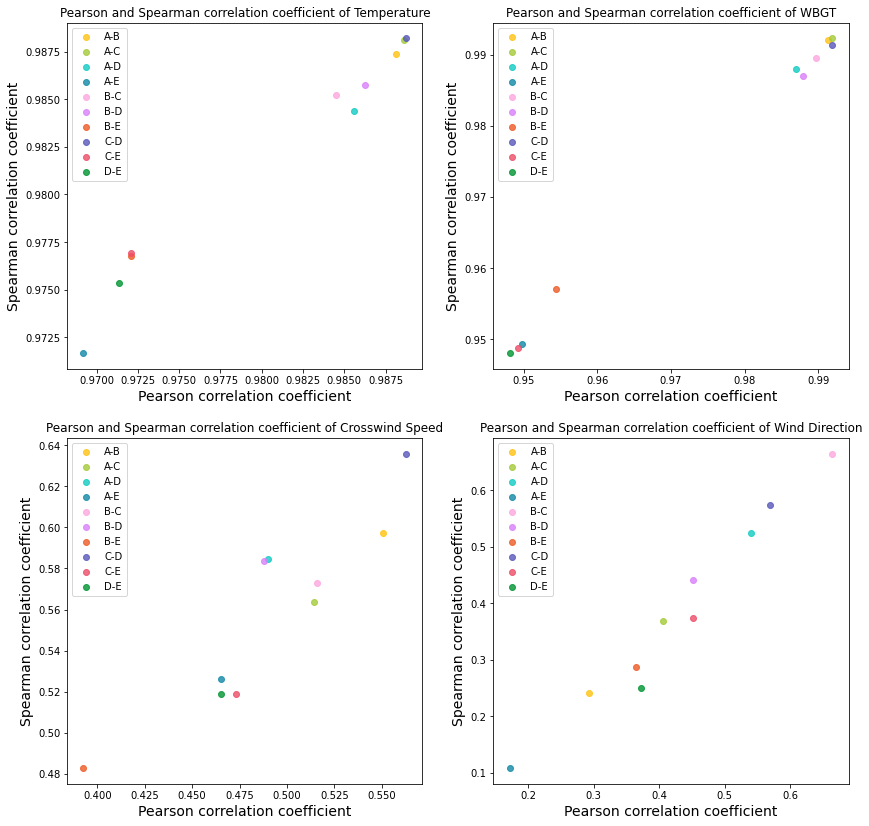

In [14]:
color_combinations = ['#FFC312', '#A3CB38', '#12CBC4', '#1289A7', '#FDA7DF', '#D980FA', '#EE5A24', '#5758BB', '#ED4C67', '#009432']
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,14))
color_index = 0
for i_11 in list(combinations(sensor_label,2)):
    data_A31['Pearson_temp_'+i_11[0]+'-'+i_11[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_11[0])['Temperature'].astype(float), data_A31.get('data_co_'+i_11[1])['Temperature'].astype(float))
    data_A31['Spearman_temp_'+i_11[0]+'-'+i_11[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_11[0])['Temperature'].astype(float), data_A31.get('data_co_'+i_11[1])['Temperature'].astype(float), axis=None)
    ax[0][0].scatter(data_A31.get('Pearson_temp_'+i_11[0]+'-'+i_11[1]), data_A31.get('Spearman_temp_'+i_11[0]+'-'+i_11[1]), color=color_combinations[color_index], alpha=0.8, label=i_11[0]+'-'+i_11[1])
    data_A31['Pearson_WBGT_'+i_11[0]+'-'+i_11[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_11[0])['WBGT'].astype(float), data_A31.get('data_co_'+i_11[1])['WBGT'].astype(float))
    data_A31['Spearman_WBGT_'+i_11[0]+'-'+i_11[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_11[0])['WBGT'].astype(float), data_A31.get('data_co_'+i_11[1])['WBGT'].astype(float), axis=None)
    ax[0][1].scatter(data_A31.get('Pearson_WBGT_'+i_11[0]+'-'+i_11[1]), data_A31.get('Spearman_WBGT_'+i_11[0]+'-'+i_11[1]), color=color_combinations[color_index], alpha=0.8, label=i_11[0]+'-'+i_11[1])
    data_A31['Pearson_cs_'+i_11[0]+'-'+i_11[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_11[0])['Crosswind Speed'].astype(float), data_A31.get('data_co_'+i_11[1])['Crosswind Speed'].astype(float))
    data_A31['Spearman_cs_'+i_11[0]+'-'+i_11[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_11[0])['Crosswind Speed'].astype(float), data_A31.get('data_co_'+i_11[1])['Crosswind Speed'].astype(float), axis=None)
    ax[1][0].scatter(data_A31.get('Pearson_cs_'+i_11[0]+'-'+i_11[1]), data_A31.get('Spearman_cs_'+i_11[0]+'-'+i_11[1]), color=color_combinations[color_index], alpha=0.8, label=i_11[0]+'-'+i_11[1])
    data_A31['Pearson_wd_'+i_11[0]+'-'+i_11[1]], _ = stats.pearsonr(data_A31.get('data_co_'+i_11[0])['Wind Direction'].astype(float), data_A31.get('data_co_'+i_11[1])['Wind Direction'].astype(float))
    data_A31['Spearman_wd_'+i_11[0]+'-'+i_11[1]], _ = stats.spearmanr(data_A31.get('data_co_'+i_11[0])['Wind Direction'].astype(float), data_A31.get('data_co_'+i_11[1])['Wind Direction'].astype(float), axis=None)
    ax[1][1].scatter(data_A31.get('Pearson_wd_'+i_11[0]+'-'+i_11[1]), data_A31.get('Spearman_wd_'+i_11[0]+'-'+i_11[1]), color=color_combinations[color_index], alpha=0.8, label=i_11[0]+'-'+i_11[1])
    color_index += 1
    

ax[0][0].set_ylabel('Spearman correlation coefficient',fontsize=fs)
ax[0][0].set_xlabel('Pearson correlation coefficient', fontsize=fs)
# ax[0].set_xticks(np.arange(-1, 1, 0.1))
# ax[0].set_yticks(np.arange(-1, 1, 0.1))
ax[0][0].set_title('Pearson and Spearman correlation coefficient of Temperature')
ax[0][0].legend(loc = 'best')

ax[0][1].set_ylabel('Spearman correlation coefficient',fontsize=fs)
ax[0][1].set_xlabel('Pearson correlation coefficient', fontsize=fs)
# ax[0].set_xticks(np.arange(-1, 1, 0.1))
# ax[0].set_yticks(np.arange(-1, 1, 0.1))
ax[0][1].set_title('Pearson and Spearman correlation coefficient of WBGT')
ax[0][1].legend(loc = 'best')

ax[1][0].set_ylabel('Spearman correlation coefficient',fontsize=fs)
ax[1][0].set_xlabel('Pearson correlation coefficient', fontsize=fs)
# ax[0].set_xticks(np.arange(-1, 1, 0.1))
# ax[0].set_yticks(np.arange(-1, 1, 0.1))
ax[1][0].set_title('Pearson and Spearman correlation coefficient of Crosswind Speed')
ax[1][0].legend(loc = 'best')

ax[1][1].set_ylabel('Spearman correlation coefficient',fontsize=fs)
ax[1][1].set_xlabel('Pearson correlation coefficient', fontsize=fs)
# ax[0].set_xticks(np.arange(-1, 1, 0.1))
# ax[0].set_yticks(np.arange(-1, 1, 0.1))
ax[1][1].set_title('Pearson and Spearman correlation coefficient of Wind Direction')
ax[1][1].legend(loc = 'best')

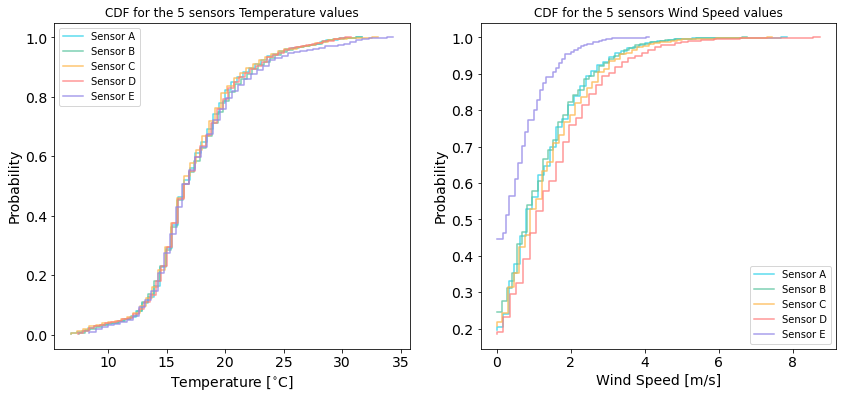

In [15]:
# ----------------------------------------------------------------------------------------------------
# Task 4.1


fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
subplots_A21 = locals()
# print(type(ax[0][0]))
for i_12 in range(5):
    # plot the 1st subplot
    subplots_A21['data_temp_'+sensor_label[i_12]] = names.get('HEAT_'+sensor_label[i_12]+'_df')['Temperature'].values.astype(np.float)
    subplots_A21['heights_temp_'+sensor_label[i_12]], subplots_A21['bins_temp_'+sensor_label[i_12]] =  np.histogram(subplots_A21.get('data_temp_'+sensor_label[i_12]), bins=50)
    # get the probability: 
    subplots_A21['heights_temp_'+sensor_label[i_12]] = subplots_A21.get('heights_temp_'+sensor_label[i_12])/sum(subplots_A21.get('heights_temp_'+sensor_label[i_12]))
#     ax[0][0].step(subplots_A21.get('bins_temp_'+sensor_label[i_12])[:-1], subplots_A21.get('heights_temp_'+sensor_label[i_12]), color=sensor_color[i_12], alpha=0.8, label='Sensor '+sensor_label[i_12])
    
    # plot the 2nd subplot
    # compute the sum probability:
    a = []
    for j in range(len(subplots_A21.get('heights_temp_'+sensor_label[i_12]))):
        if j == 0:
            a.append(subplots_A21.get('heights_temp_'+sensor_label[i_12])[0])
        else:
            a.append(subplots_A21.get('heights_temp_'+sensor_label[i_12])[j]+a[j-1])
    subplots_A21['CDF_temp_'+sensor_label[i_12]] = a
    ax[0].step(subplots_A21.get('bins_temp_'+sensor_label[i_12])[:-1], subplots_A21.get('CDF_temp_'+sensor_label[i_12]), color=sensor_color[i_12], alpha=0.8, label='Sensor '+sensor_label[i_12])
    
    subplots_A21['data_ws_'+sensor_label[i_12]] = names.get('HEAT_'+sensor_label[i_12]+'_df')['Wind Speed'].values.astype(np.float)
    subplots_A21['heights_ws_'+sensor_label[i_12]], subplots_A21['bins_ws_'+sensor_label[i_12]] =  np.histogram(subplots_A21.get('data_ws_'+sensor_label[i_12]), bins=50)
    # get the probability: 
    subplots_A21['heights_ws_'+sensor_label[i_12]] = subplots_A21.get('heights_ws_'+sensor_label[i_12])/sum(subplots_A21.get('heights_ws_'+sensor_label[i_12]))
#     ax[0][0].step(subplots_A21.get('bins_temp_'+sensor_label[i_12])[:-1], subplots_A21.get('heights_temp_'+sensor_label[i_12]), color=sensor_color[i_12], alpha=0.8, label='Sensor '+sensor_label[i_12])
    
    # plot the 2nd subplot
    # compute the sum probability:
    a = []
    for j in range(len(subplots_A21.get('heights_ws_'+sensor_label[i_12]))):
        if j == 0:
            a.append(subplots_A21.get('heights_ws_'+sensor_label[i_12])[0])
        else:
            a.append(subplots_A21.get('heights_ws_'+sensor_label[i_12])[j]+a[j-1])
    subplots_A21['CDF_ws_'+sensor_label[i_12]] = a
    ax[1].step(subplots_A21.get('bins_ws_'+sensor_label[i_12])[:-1], subplots_A21.get('CDF_ws_'+sensor_label[i_12]), color=sensor_color[i_12], alpha=0.8, label='Sensor '+sensor_label[i_12])

ax[0].set_ylabel('Probability',fontsize=fs)
ax[0].set_xlabel('Temperature [$^{\circ}$C]', fontsize=fs)
ax[0].tick_params(labelsize=fs)
ax[0].set_title('CDF for the 5 sensors Temperature values')
ax[0].legend(loc = 'best')
ax[1].set_ylabel('Probability',fontsize=fs)
ax[1].set_xlabel('Wind Speed [m/s]', fontsize=fs)
ax[1].tick_params(labelsize=fs)
ax[1].set_title('CDF for the 5 sensors Wind Speed values')
ax[1].legend(loc = 'best')

In [16]:
confidence_intervals_temp =[]
confidence_intervals_ws =[]
for i_13 in sensor_label:
    n = len(names.get('HEAT_'+i_13+'_df')['Temperature'].values.astype(np.float))
    m = np.mean(names.get('HEAT_'+i_13+'_df')['Temperature'].values.astype(np.float))
    std_err = sem(names.get('HEAT_'+i_13+'_df')['Temperature'].values.astype(np.float))
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    confidence_intervals_temp.append(str(m-h)+'~'+str(m+h))
    n = len(names.get('HEAT_'+i_13+'_df')['Wind Speed'].values.astype(np.float))
    m = np.mean(names.get('HEAT_'+i_13+'_df')['Wind Speed'].values.astype(np.float))
    std_err = sem(names.get('HEAT_'+i_13+'_df')['Wind Speed'].values.astype(np.float))
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    confidence_intervals_ws.append(str(m-h)+'~'+str(m+h))
# print(confidence_intervals_temp, confidence_intervals_ws)
dataframe_A41 = pd.DataFrame({'Sensor':sensor_label,'95% confidence intervals of Temperature':confidence_intervals_temp,'95% confidence intervals of Wind Speed':confidence_intervals_ws})
dataframe_A41.to_csv('confidence_intervals.csv',index=False,sep=',')

In [17]:
# ----------------------------------------------------------------------------------------------------
# Task 4.2

def compare_2_groups(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f, ' % (stat, p), end='')
    if p > alpha:
        print('Same distributions (fail to reject H0)')
#         print('\n')
    else:
        print('Different distributions (reject H0)')
#         print('\n')
for i_14 in list([('E', 'D'), ('D', 'C'), ('C', 'B'), ('B', 'A')]):
    print('Temperature same hypothesis for '+i_14[0]+' and '+i_14[1]+': ', end='')
    compare_2_groups(names.get('HEAT_'+i_14[0]+'_df')['Temperature'].values.astype(np.float), names.get('HEAT_'+i_14[1]+'_df')['Temperature'].values.astype(np.float), 0.05)
    print('Wind Speed same hypothesis for '+i_14[0]+' and '+i_14[1]+': ', end='')
    compare_2_groups(names.get('HEAT_'+i_14[0]+'_df')['Wind Speed'].values.astype(np.float), names.get('HEAT_'+i_14[1]+'_df')['Wind Speed'].values.astype(np.float), 0.05)
    print('\n')


Temperature same hypothesis for E and D: Statistics=3.000, p=0.003, Different distributions (reject H0)
Wind Speed same hypothesis for E and D: Statistics=-32.673, p=0.000, Different distributions (reject H0)


Temperature same hypothesis for D and C: Statistics=0.729, p=0.466, Same distributions (fail to reject H0)
Wind Speed same hypothesis for D and C: Statistics=5.871, p=0.000, Different distributions (reject H0)


Temperature same hypothesis for C and B: Statistics=-1.324, p=0.185, Same distributions (fail to reject H0)
Wind Speed same hypothesis for C and B: Statistics=3.893, p=0.000, Different distributions (reject H0)


Temperature same hypothesis for B and A: Statistics=0.841, p=0.400, Same distributions (fail to reject H0)
Wind Speed same hypothesis for B and A: Statistics=-1.501, p=0.134, Same distributions (fail to reject H0)




In [18]:
# ----------------------------------------------------------------------------------------------------
# Bonus question

date_time_b = datetime.datetime(2020, 6, 10, 0, 0, 0)
BQ = locals() 
for i_BQ in sensor_label:
    BQ['str_time_df_'+i_BQ] = pd.DataFrame(names.get('HEAT_'+i_BQ+'_df'), columns=['FORMATTED DATE-TIME', 'Temperature'])
    for j in range(len(BQ.get('str_time_df_'+i_BQ)['FORMATTED DATE-TIME'])):
        BQ.get('str_time_df_'+i_BQ)['FORMATTED DATE-TIME'][j+5] = BQ.get('str_time_df_'+i_BQ)['FORMATTED DATE-TIME'][j+5].strftime('%m%d')

date_time_str = date_time_b.strftime('%m%d')
mean_temp = {0:[]}
while date_time_str:
    BQ['temperature_of_'+date_time_str] = np.asarray([])
    for i_BQ_2 in sensor_label:
        if i_BQ_2 == 'A':
            BQ['temperature_of_'+date_time_str] = BQ.get('str_time_df_'+i_BQ_2).loc[BQ.get('str_time_df_'+i_BQ_2)['FORMATTED DATE-TIME'] == date_time_str]['Temperature'].values.astype(np.float)
        else:
            BQ['temperature_of_'+date_time_str] = np.concatenate((BQ.get('temperature_of_'+date_time_str),BQ.get('str_time_df_'+i_BQ_2).loc[BQ.get('str_time_df_'+i_BQ_2)['FORMATTED DATE-TIME'] == date_time_str]['Temperature'].values.astype(np.float)))
    mean_temp.update({date_time_str: np.mean((BQ.get('temperature_of_'+date_time_str)))}) 
    date_time_str = (datetime.datetime.strptime(date_time_str, '%m%d')+datetime.timedelta(days=1)).strftime('%m%d')
    if date_time_str == '0715':
        break

del mean_temp[0]

print('The hotest day:', max(mean_temp, key=mean_temp.get))
print('The coldest day:', min(mean_temp, key=mean_temp.get))

The hotest day: 0626
The coldest day: 0610
